#  Company LinkedIn Content/ Persona Analytics using NLP By M V NIKESH

To perform Content Analytics on company/ organization. To obtain the final results its further divided in to three phases

PHASE I:
* Using Selinium and web driver libraries log into LinkedIn account
* Scrape the content with required features like 
i.  postNumber,
ii. Post text,
iii.Time Posted Before,
iv. Tags in Post,
v.  Number of likes,
vi. Profile links of people who liked the post

PHASE II:
* Store the features in CSV format to perform further analysis.
* Visualise the metrics to understand company/ organization online presence and LinkedIn persona in social media.
* Using MatplotLib visualize the metrics i.e, PostNumber, Number of Likes in post, Tags in post 

PHASE III:
* Retrieve CSV file to perform text Analytics using NLP.
* Perform Data Preprocessing checking Null values, missing data
* Using NLTK library eliminate stopwords from required variables like Post Text, Tags in Post
* Clean the text content using stemming process
* After stemming data which is obtained visualise Post text feature in word cloud format
* Perform same procedure for the Tags in post feature in word cloud.

CONCLUSION
* Produce key Insights and recommendations on content and LinkedIn persona of organization/ company.

# O P Jindal University LinkedIn content Analytics

In [3]:
from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv
file = open('linkedInPostDetails.csv', 'w+', newline='',encoding='utf8')

# s = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)

driver.get("https://www.linkedin.com/home")
time.sleep(3)
def loginFunc():
    username = driver.find_element(By.ID, "session_key")
    username.send_keys("username")
    pword = driver.find_element(By.ID, "session_password")
    pword.send_keys("password")
    driver.find_element(By.CLASS_NAME,"sign-in-form__submit-btn--full-width").click()
    # '/html/body/main/section[1]/div/div/form[1]/div[2]/button'
    time.sleep(2)

loginFunc()
companyPostLink = 'https://www.linkedin.com/school/jindalglobaluni/posts/?feedView=all'
driver.get(companyPostLink)
time.sleep(3)
counter = 1

while True:
    try:
        print('Scrolling:', counter)
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(3)
    except:
        print('Error: Not scrolling')
        time.sleep(5)
    counter = 1
    if counter == 2: # how many times to scroll down
        break
print('Taking long break..........................')
time.sleep(6)

tempSelenium = driver.find_elements(By.XPATH, '/html/body/div[5]/div[3]/div/div[2]/div/div[2]/main/div[2]/div/div[2]/div[3]/div/div[1]/div')
total1 = len(tempSelenium)
# print('Total posts (possible) - selenium div 5:', total1)
if len(tempSelenium) == 0:
    tempSelenium = driver.find_elements(By.XPATH,
                                        '/html/body/div[4]/div[3]/div/div[2]/div/div[2]/main/div[2]/div/div[2]/div[3]/div/div[1]/div')
total1 = len(tempSelenium)
print('Total posts (possible) - selenium:', total1)
post = ''
timeBefore = ''
tags = []
profileLinksLiked = []
postNumber = 1
with file:
    write = csv.writer(file)
    data = ['postNumber', 'Post text', 'Time Posted Before', 'Tags in Post', 'Number of likes',
            'Profile links of people who liked the post']
    write.writerow(data)
    for index, item00 in enumerate(tempSelenium):
        # if index > 0:
        #         break
            print(index+1, '/', total1)
            try:
                temp01Sel = item00.find_elements(By.XPATH, './/div/div/div/div[4]/div/div/span/span/span')
                temp011Sel = item00.find_elements(By.XPATH, './/div/div/div/div[4]/div/div/span/span/span/a')
                if len(temp01Sel) == 0:
                    continue
                print('Post:', temp01Sel[0].text)
                post = temp01Sel[0].text
                tags = [item011.get_attribute('text') for item011 in temp011Sel]
                print('Tags:', tags)
            except:
                print('Error: Post text is not available')

            try:
                timeSpans = item00.find_elements(By.XPATH, './/div/div/div/div[2]/a/div[3]/span[3]/div/span[1]/span[1]')
                temp = timeSpans[0].text
                temp1 = temp.split()
                timeBefore = temp1[0]
                print('Time:', timeBefore)
            except:
                print('Error: Time of post is not available')

            likeCounts = 0
            try:
                try:
                    temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button/span/span[1]')
                    text02 = temp02Sel[0].text
                except:
                    temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li/button/span')
                    if len(temp02Sel) != 1:
                        temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button/span')
                    text02 = temp02Sel[0].text
                word1 = text02.split(',')
                try:
                    likeCounts = int(word1[0] + word1[1])
                except:
                    likeCounts = int(text02)
                # print('Liked Counts:', likeCounts)
            except:
                print('Error: Post <liked by> text is not available')

            try:
                try:
                    time.sleep(2)
                    temp03Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button')
                    time.sleep(2)
                    # print('1st link Length:', len(temp03Sel))
                    temp03Sel[0].click()
                    # print('Button clicked successfully by 1st link............................')
                except:
                    time.sleep(2)
                    temp03Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li/button')
                    time.sleep(2)
                    # print('2nd link Length:', len(temp03Sel))
                    temp03Sel[0].click()
                    # print('Button clicked successfully by 2nd link............................')
                time.sleep(3)
                try:
                    temp030Sel = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[2]')
                    time.sleep(2)
                except:
                    print('Error: DIV not found')
                try:
                    temp031Sel = driver.find_elements(By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[1]/ul/li')
                    time.sleep(2)
                except:
                    print('Error: list of profiles not found')
                # print('No. of profiles listed - 1:', len(temp031Sel))
                verical_ordinate = 100
                oldCount = 0
                # while len(temp031Sel) < likeCounts and len(temp031Sel) < 10: # For debugging
                counter = 1
                while len(temp031Sel) < likeCounts:
                    # print(verical_ordinate)
                    try:
                        driver.execute_script("arguments[0].scrollIntoView();", temp031Sel[-1])
                        # print('last element')
                    except:
                        driver.execute_script('arguments[0].scrollTop = arguments[1]', temp030Sel, verical_ordinate)
                        verical_ordinate += 100
                        # print('verical_ordinate')
                    time.sleep(1)
                    if counter % 5 == 0:
                        oldCount = len(temp031Sel)
                    counter += 1
                    temp031Sel = driver.find_elements(By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[1]/ul/li')
                    if oldCount == len(temp031Sel) and counter % 4 == 0:
                        break
                # print('No. of profiles extracted:', len(temp031Sel))
                # print('Profiles of Liked person:')
                profileLinksLiked = []
                for item03 in temp031Sel:
                    temp032Sel = item03.find_elements(By.XPATH, './/div/div/a')
                    text031 = temp032Sel[0].get_attribute('href')
                    # print(text031)
                    profileLinksLiked.append(text031)
                driver.find_element(By.XPATH, '/html/body/div[3]/div/div/button').click()
                time.sleep(2)
            except:
                print('Error: Button in Post is not available')
            data = [postNumber, post, timeBefore, ','.join(tags), likeCounts, ','.join(profileLinksLiked)]
            print('Post Number:',postNumber,' & Liked counts:',likeCounts)
            print('*********************************************************')
            postNumber += 1
            write.writerow(data)
print('***********************Extracted all post details***********************')
time.sleep(300)

C:\Users\91852\AppData\Local\Temp\ipykernel_26148\1508373462.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


Scrolling: 1
Taking long break..........................
Total posts (possible) - selenium: 23
1 / 23
Post: We are pleased to announce that following the victory in the national championship of the Leiden-ICC Moot Court Competition earlier this year, the Jindal Global Law School (JGLS) team went on to represent the university and country at the Global Rounds in The Hague, Netherlands.
 
Amidst fierce competition from 55 countries, our JGLS team performed exceptionally well, reaching the quarter-finals and ranking third overall of 89 teams.

Additionally, the team achieved remarkable success in individual categories, with the Best Defence Counsel Team award, the First Runner-Up Best Prosecution Memorial and Keshav Menon being recognized as the First Runner-Up Best Defence Speaker.

Congratulations to the outstanding efforts of the team who represented us with immense dedication and professionalism:
(Captain and Researcher)
(Researcher)
(Speaker for the Office of the Prosecutor)
(Speaker

# Visualize with the results obtained.

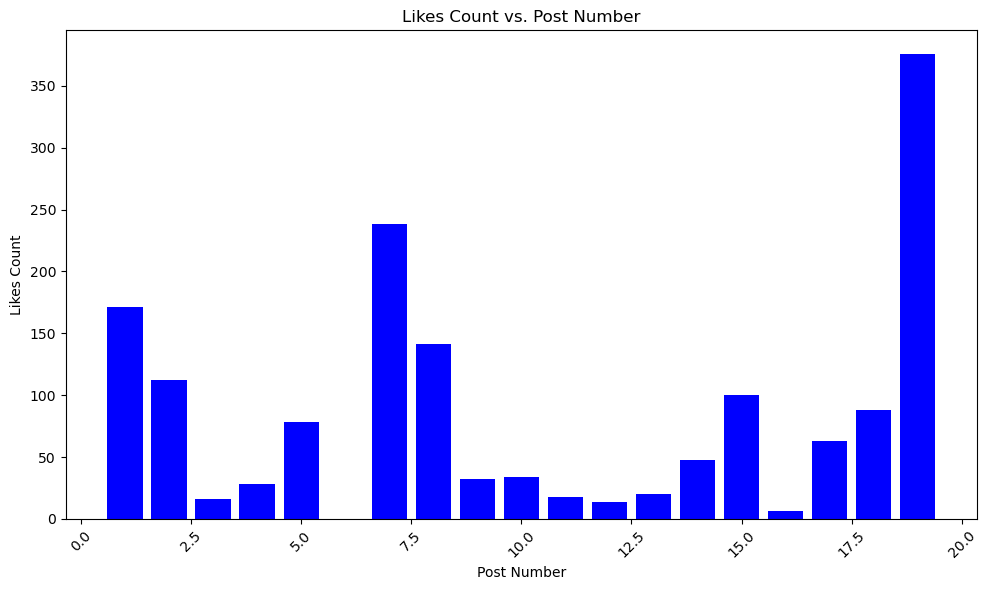

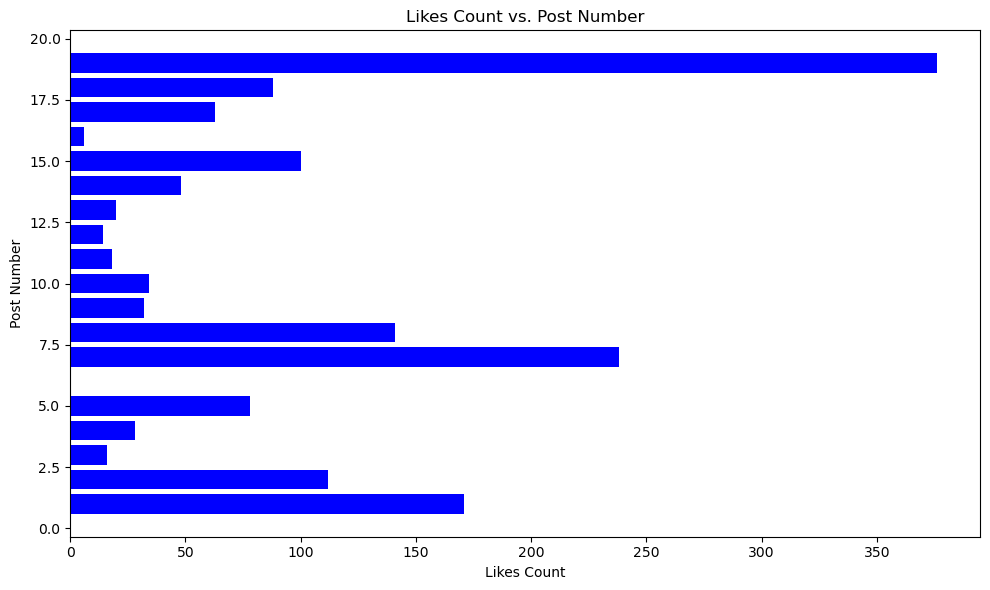

In [4]:
import matplotlib.pyplot as plt

# ... Previous code ...

post_numbers = []
likes_counts = []

with open('linkedInPostDetails.csv', 'r', encoding='utf8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        post_number = int(row[0])
        likes_count = int(row[4])
        post_numbers.append(post_number)
        likes_counts.append(likes_count)

# Plotting post number
plt.figure(figsize=(10, 6))
plt.bar(post_numbers, likes_counts, color='blue')
plt.xlabel('Post Number')
plt.ylabel('Likes Count')
plt.title('Likes Count vs. Post Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting likes count
plt.figure(figsize=(10, 6))
plt.barh(post_numbers, likes_counts, color='blue')
plt.xlabel('Likes Count')
plt.ylabel('Post Number')
plt.title('Likes Count vs. Post Number')
plt.tight_layout()
plt.show()

#Inferences
* PostNumber is denoted as Days where Day 01 - Post 01
* It is inferred that traction on the content is increasing gradually with some low dips in series
* From Day 07.15, 17 posts which are initaited have touch points on International and social politics where impressions are touched high points.
* Knowledge sharing sessions such as Instagram Live with professors,renowned public departments deligates also have high impressions.
* JGU is getting traction from cluster of Public Policy and International affairs on social issues which audiences are more interested.
--
Recommendations
* To get more traction & Exposure on the organization we need to promote and conduct more sessions and talks on Public Policy & Social topics.

# Response Informatics LinkedIn Content Analytics

In [6]:
from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv
file = open('linkedInPostDetails.csv', 'w+', newline='',encoding='utf8')

# s = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)

driver.get("https://www.linkedin.com/home")
time.sleep(3)
def loginFunc():
    username = driver.find_element(By.ID, "session_key")
    username.send_keys("username")
    pword = driver.find_element(By.ID, "session_password")
    pword.send_keys("pasword")
    driver.find_element(By.CLASS_NAME,"sign-in-form__submit-btn--full-width").click()
    # '/html/body/main/section[1]/div/div/form[1]/div[2]/button'
    time.sleep(2)

loginFunc()
companyPostLink = 'https://www.linkedin.com/company/response-informatics-ltd/posts/?feedView=all'
driver.get(companyPostLink)
time.sleep(3)
counter = 1

while True:
    try:
        print('Scrolling:', counter)
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(3)
    except:
        print('Error: Not scrolling')
        time.sleep(5)
    counter = 1
    if counter == 2: # how many times to scroll down
        break
print('Taking long break..........................')
time.sleep(6)

tempSelenium = driver.find_elements(By.XPATH, '/html/body/div[5]/div[3]/div/div[2]/div/div[2]/main/div[2]/div/div[2]/div[3]/div/div[1]/div')
total1 = len(tempSelenium)
# print('Total posts (possible) - selenium div 5:', total1)
if len(tempSelenium) == 0:
    tempSelenium = driver.find_elements(By.XPATH,
                                        '/html/body/div[4]/div[3]/div/div[2]/div/div[2]/main/div[2]/div/div[2]/div[3]/div/div[1]/div')
total1 = len(tempSelenium)
print('Total posts (possible) - selenium:', total1)
post = ''
timeBefore = ''
tags = []
profileLinksLiked = []
postNumber = 1
with file:
    write = csv.writer(file)
    data = ['postNumber', 'Post text', 'Time Posted Before', 'Tags in Post', 'Number of likes',
            'Profile links of people who liked the post']
    write.writerow(data)
    for index, item00 in enumerate(tempSelenium):
        # if index > 0:
        #         break
            print(index+1, '/', total1)
            try:
                temp01Sel = item00.find_elements(By.XPATH, './/div/div/div/div[4]/div/div/span/span/span')
                temp011Sel = item00.find_elements(By.XPATH, './/div/div/div/div[4]/div/div/span/span/span/a')
                if len(temp01Sel) == 0:
                    continue
                print('Post:', temp01Sel[0].text)
                post = temp01Sel[0].text
                tags = [item011.get_attribute('text') for item011 in temp011Sel]
                print('Tags:', tags)
            except:
                print('Error: Post text is not available')

            try:
                timeSpans = item00.find_elements(By.XPATH, './/div/div/div/div[2]/a/div[3]/span[3]/div/span[1]/span[1]')
                temp = timeSpans[0].text
                temp1 = temp.split()
                timeBefore = temp1[0]
                print('Time:', timeBefore)
            except:
                print('Error: Time of post is not available')

            likeCounts = 0
            try:
                try:
                    temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button/span/span[1]')
                    text02 = temp02Sel[0].text
                except:
                    temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li/button/span')
                    if len(temp02Sel) != 1:
                        temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button/span')
                    text02 = temp02Sel[0].text
                word1 = text02.split(',')
                try:
                    likeCounts = int(word1[0] + word1[1])
                except:
                    likeCounts = int(text02)
                # print('Liked Counts:', likeCounts)
            except:
                print('Error: Post <liked by> text is not available')

            try:
                try:
                    time.sleep(2)
                    temp03Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button')
                    time.sleep(2)
                    # print('1st link Length:', len(temp03Sel))
                    temp03Sel[0].click()
                    # print('Button clicked successfully by 1st link............................')
                except:
                    time.sleep(2)
                    temp03Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li/button')
                    time.sleep(2)
                    # print('2nd link Length:', len(temp03Sel))
                    temp03Sel[0].click()
                    # print('Button clicked successfully by 2nd link............................')
                time.sleep(3)
                try:
                    temp030Sel = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[2]')
                    time.sleep(2)
                except:
                    print('Error: DIV not found')
                try:
                    temp031Sel = driver.find_elements(By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[1]/ul/li')
                    time.sleep(2)
                except:
                    print('Error: list of profiles not found')
                # print('No. of profiles listed - 1:', len(temp031Sel))
                verical_ordinate = 100
                oldCount = 0
                # while len(temp031Sel) < likeCounts and len(temp031Sel) < 10: # For debugging
                counter = 1
                while len(temp031Sel) < likeCounts:
                    # print(verical_ordinate)
                    try:
                        driver.execute_script("arguments[0].scrollIntoView();", temp031Sel[-1])
                        # print('last element')
                    except:
                        driver.execute_script('arguments[0].scrollTop = arguments[1]', temp030Sel, verical_ordinate)
                        verical_ordinate += 100
                        # print('verical_ordinate')
                    time.sleep(1)
                    if counter % 5 == 0:
                        oldCount = len(temp031Sel)
                    counter += 1
                    temp031Sel = driver.find_elements(By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[1]/ul/li')
                    if oldCount == len(temp031Sel) and counter % 4 == 0:
                        break
                # print('No. of profiles extracted:', len(temp031Sel))
                # print('Profiles of Liked person:')
                profileLinksLiked = []
                for item03 in temp031Sel:
                    temp032Sel = item03.find_elements(By.XPATH, './/div/div/a')
                    text031 = temp032Sel[0].get_attribute('href')
                    # print(text031)
                    profileLinksLiked.append(text031)
                driver.find_element(By.XPATH, '/html/body/div[3]/div/div/button').click()
                time.sleep(2)
            except:
                print('Error: Button in Post is not available')
            data = [postNumber, post, timeBefore, ','.join(tags), likeCounts, ','.join(profileLinksLiked)]
            print('Post Number:',postNumber,' & Liked counts:',likeCounts)
            print('*********************************************************')
            postNumber += 1
            write.writerow(data)
print('***********************Extracted all post details***********************')
time.sleep(300)

C:\Users\91852\AppData\Local\Temp\ipykernel_26148\4054669214.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


Scrolling: 1
Taking long break..........................
Total posts (possible) - selenium: 23
1 / 23
Post: Response Informatics Ltd is pleased to announce the implementation of a new Employee Stock Option Plan (ESOP), which will offer stock options to eligible employees. This program is designed to incentivize and reward our employees for their hard work and commitment to our company's success.

Under the ESOP scheme 2022, eligible employees will be granted stock options that will give them the right to purchase shares of Response Informatics Ltd stock at a predetermined price. These options will vest over a period and will provide our employees with an opportunity to share in the growth and success of our company.

"We are thrilled to be able to offer this new ESOP program to our employees," said , Managing Director of Response Informatics Ltd. "We recognize that our employees are the heart and soul of our company, and we believe that this program will help us attract and retain top 

# Visualize the results obtained

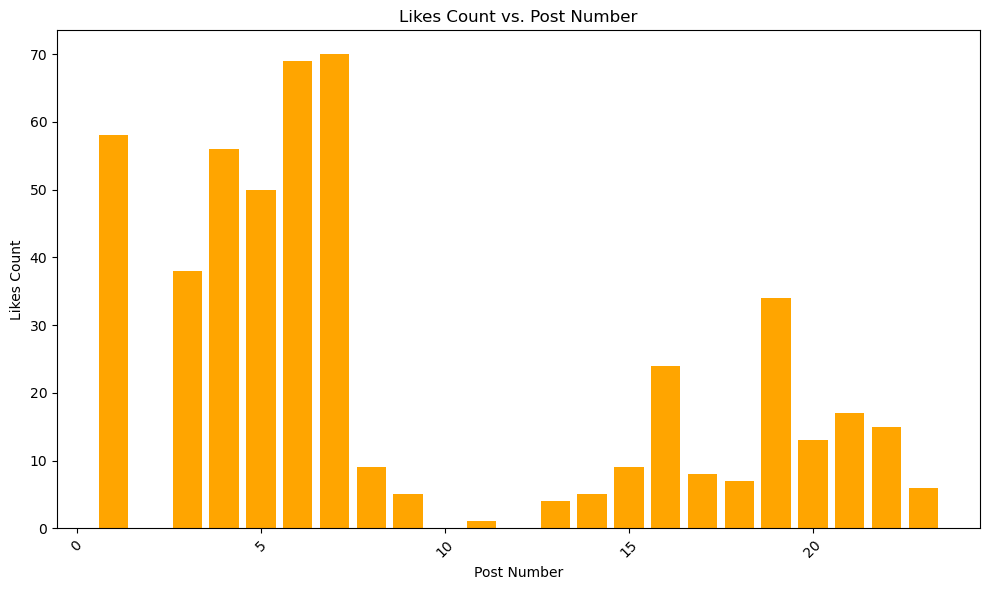

In [7]:
import matplotlib.pyplot as plt

# ... Previous code ...

post_numbers = []
likes_counts = []

with open('linkedInPostDetails.csv', 'r', encoding='utf8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        post_number = int(row[0])
        likes_count = int(row[4])
        post_numbers.append(post_number)
        likes_counts.append(likes_count)

# Plotting post number
plt.figure(figsize=(10, 6))
plt.bar(post_numbers, likes_counts, color='orange')
plt.xlabel('Post Number')
plt.ylabel('Likes Count')
plt.title('Likes Count vs. Post Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Inferences
* Response informatics is experienced with more traction and exposure on LinkedIn media
* Initial Days in LinkedIn no of impressions were exponential but recent days there is dip in impressions and exposure.
* Introducing Response Informatics, Company culture and services provided in comapany where in Day 02,04, 05 are intiated with posts have high traction.
* Recently Respsonse Informatics posted Job openngs on Sales department and banking domain where there is dip in traction.
* Cluster of audiences are individuals who are active job seekers and vendors who are looking for valuable service and consulting
--
Recommendation
* Introducing services provided by response informatics should much more precise and clear to audiences.
* To attain more traction need to focus and modify on hashtags and content startegy.

# L & T LinkedIn Content Analytics

In [9]:
from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv
file = open('L&TlinkedInPostDetails.csv', 'w+', newline='',encoding='utf8')

# s = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)

driver.get("https://www.linkedin.com/home")
time.sleep(3)
def loginFunc():
    username = driver.find_element(By.ID, "session_key")
    username.send_keys("username")
    pword = driver.find_element(By.ID, "session_password")
    pword.send_keys("pasword")
    driver.find_element(By.CLASS_NAME,"sign-in-form__submit-btn--full-width").click()
    # '/html/body/main/section[1]/div/div/form[1]/div[2]/button'
    time.sleep(2)

loginFunc()
companyPostLink = 'https://www.linkedin.com/company/l&t-technology-services-limited/posts/?feedView=all'
driver.get(companyPostLink)
time.sleep(3)
counter = 1

while True:
    try:
        print('Scrolling:', counter)
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(3)
    except:
        print('Error: Not scrolling')
        time.sleep(5)
    counter = 1
    if counter == 2: # how many times to scroll down
        break
print('Taking long break..........................')
time.sleep(6)

tempSelenium = driver.find_elements(By.XPATH, '/html/body/div[5]/div[3]/div/div[2]/div/div[2]/main/div[2]/div/div[2]/div[3]/div/div[1]/div')
total1 = len(tempSelenium)
# print('Total posts (possible) - selenium div 5:', total1)
if len(tempSelenium) == 0:
    tempSelenium = driver.find_elements(By.XPATH,
                                        '/html/body/div[4]/div[3]/div/div[2]/div/div[2]/main/div[2]/div/div[2]/div[3]/div/div[1]/div')
total1 = len(tempSelenium)
print('Total posts (possible) - selenium:', total1)
post = ''
timeBefore = ''
tags = []
profileLinksLiked = []
postNumber = 1
with file:
    write = csv.writer(file)
    data = ['postNumber', 'Post text', 'Time Posted Before', 'Tags in Post', 'Number of likes',
            'Profile links of people who liked the post']
    write.writerow(data)
    for index, item00 in enumerate(tempSelenium):
        # if index > 0:
        #         break
            print(index+1, '/', total1)
            try:
                temp01Sel = item00.find_elements(By.XPATH, './/div/div/div/div[4]/div/div/span/span/span')
                temp011Sel = item00.find_elements(By.XPATH, './/div/div/div/div[4]/div/div/span/span/span/a')
                if len(temp01Sel) == 0:
                    continue
                print('Post:', temp01Sel[0].text)
                post = temp01Sel[0].text
                tags = [item011.get_attribute('text') for item011 in temp011Sel]
                print('Tags:', tags)
            except:
                print('Error: Post text is not available')

            try:
                timeSpans = item00.find_elements(By.XPATH, './/div/div/div/div[2]/a/div[3]/span[3]/div/span[1]/span[1]')
                temp = timeSpans[0].text
                temp1 = temp.split()
                timeBefore = temp1[0]
                print('Time:', timeBefore)
            except:
                print('Error: Time of post is not available')

            likeCounts = 0
            try:
                try:
                    temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button/span/span[1]')
                    text02 = temp02Sel[0].text
                except:
                    temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li/button/span')
                    if len(temp02Sel) != 1:
                        temp02Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button/span')
                    text02 = temp02Sel[0].text
                word1 = text02.split(',')
                try:
                    likeCounts = int(word1[0] + word1[1])
                except:
                    likeCounts = int(text02)
                # print('Liked Counts:', likeCounts)
            except:
                print('Error: Post <liked by> text is not available')

            try:
                try:
                    time.sleep(2)
                    temp03Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li[1]/button')
                    time.sleep(2)
                    # print('1st link Length:', len(temp03Sel))
                    temp03Sel[0].click()
                    # print('Button clicked successfully by 1st link............................')
                except:
                    time.sleep(2)
                    temp03Sel = item00.find_elements(By.XPATH, './/div/div/div/div[6]/ul/li/button')
                    time.sleep(2)
                    # print('2nd link Length:', len(temp03Sel))
                    temp03Sel[0].click()
                    # print('Button clicked successfully by 2nd link............................')
                time.sleep(3)
                try:
                    temp030Sel = driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[2]')
                    time.sleep(2)
                except:
                    print('Error: DIV not found')
                try:
                    temp031Sel = driver.find_elements(By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[1]/ul/li')
                    time.sleep(2)
                except:
                    print('Error: list of profiles not found')
                # print('No. of profiles listed - 1:', len(temp031Sel))
                verical_ordinate = 100
                oldCount = 0
                # while len(temp031Sel) < likeCounts and len(temp031Sel) < 10: # For debugging
                counter = 1
                while len(temp031Sel) < likeCounts:
                    # print(verical_ordinate)
                    try:
                        driver.execute_script("arguments[0].scrollIntoView();", temp031Sel[-1])
                        # print('last element')
                    except:
                        driver.execute_script('arguments[0].scrollTop = arguments[1]', temp030Sel, verical_ordinate)
                        verical_ordinate += 100
                        # print('verical_ordinate')
                    time.sleep(1)
                    if counter % 5 == 0:
                        oldCount = len(temp031Sel)
                    counter += 1
                    temp031Sel = driver.find_elements(By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[1]/ul/li')
                    if oldCount == len(temp031Sel) and counter % 4 == 0:
                        break
                # print('No. of profiles extracted:', len(temp031Sel))
                # print('Profiles of Liked person:')
                profileLinksLiked = []
                for item03 in temp031Sel:
                    temp032Sel = item03.find_elements(By.XPATH, './/div/div/a')
                    text031 = temp032Sel[0].get_attribute('href')
                    # print(text031)
                    profileLinksLiked.append(text031)
                driver.find_element(By.XPATH, '/html/body/div[3]/div/div/button').click()
                time.sleep(2)
            except:
                print('Error: Button in Post is not available')
            data = [postNumber, post, timeBefore, ','.join(tags), likeCounts, ','.join(profileLinksLiked)]
            print('Post Number:',postNumber,' & Liked counts:',likeCounts,' & Tags:',tags)
            print('*********************************************************')
            postNumber += 1
            write.writerow(data)
print('***********************Extracted all post details***********************')
time.sleep(300)

C:\Users\91852\AppData\Local\Temp\ipykernel_26148\2581821904.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


Scrolling: 1
Taking long break..........................
Total posts (possible) - selenium: 23
1 / 23
Post: Thrilled to announce that we have won three prestigious awards at the first edition of the nasscom Spotlight Awards! 🎉🌟.

LTTS won Product and Process Innovation Awards in the 'Ideation to Engineering Leadership' category. This recognition is a testament to our team's dedication and innovative approach towards solving complex challenges.

A special shoutout to NASSCOM for providing a platform where we could showcase our capabilities. These awards motivate us to continue pushing boundaries and 'Engineering The Change' for our customers.
Tags: ['nasscom', '#NASSCOMSpotlightAwards', '#InnovationLeadership', '#EngineeringTheChange']
Time: 4d
Error: Button in Post is not available
Post Number: 1  & Liked counts: 634  & Tags: ['nasscom', '#NASSCOMSpotlightAwards', '#InnovationLeadership', '#EngineeringTheChange']
*********************************************************
2 / 23
Post: An

# Visualize the results obtained

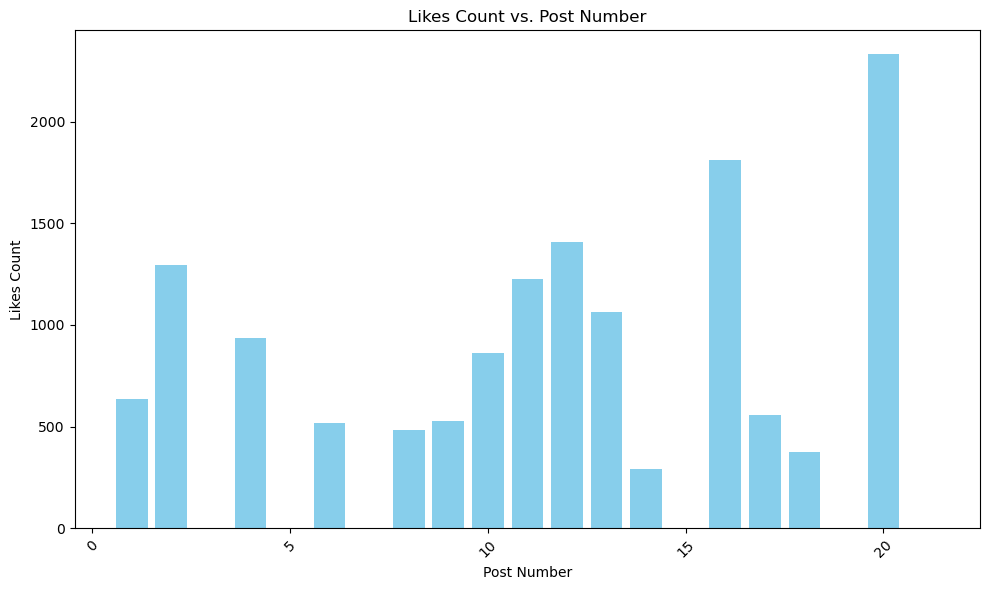

In [10]:
import matplotlib.pyplot as plt

# ... Previous code ...

post_numbers = []
likes_counts = []

with open('L&TlinkedInPostDetails.csv', 'r', encoding='utf8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        post_number = int(row[0])
        likes_count = int(row[4])
        post_numbers.append(post_number)
        likes_counts.append(likes_count)

# Plotting post number
plt.figure(figsize=(10, 6))
plt.bar(post_numbers, likes_counts, color='skyblue')
plt.xlabel('Post Number')
plt.ylabel('Likes Count')
plt.title('Likes Count vs. Post Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Inferences
* L & T is established company where impressions an d exposure have high chance of opportinity to cater large audiences.
* The pattern is following gradual increase with minor dips in between the time series.
* Day 02, 10, 12, 20 where impressions and traction was increased exponentially where posts are related to L&T innovation and company culture certifications.
* L & T posted articles introducing technologies used in the company where vendors were happy with the prodcut.
* Introdcucing hackothons and events for talent search also attains more prospects to the LinkedIn L& T personas.
--
Recommendations
* Sustainability technology in L&T was having dip in the traction from audiences where content startegy and visualising content should be modified.
* Technology with insightful articles can bring more traction from audiences.

# Phase III : Performing Text Analytics on obtained data using NLP

# Response Informatics Text Analaytics

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ldata = pd.read_csv("linkedInPostDetails.csv")
print(ldata.head())

   postNumber                                          Post text  \
0           1  Response Informatics Ltd is pleased to announc...   
1           2  ANNOUNCEMENT OF ACQUISITON OF TECHNOLOGIA CORP...   
2           3  One Festival, Many Names, One Nation!!!\nBe it...   
3           4  Though we are Late, here we bring the latest g...   
4           5  Great things in Business are never done by one...   

  Time Posted Before                                       Tags in Post  \
0                5mo  Response Informatics,Subbu Seetharaman,Ramki P...   
1                5mo  Response Informatics,Technologia Corporation,S...   
2                6mo  #Pongal,#sankranti,#celebrationatoffice,#ponga...   
3                8mo  Response Informatics,#halloween2022,#responsei...   
4               10mo  #teambuilding,#dussehraspecial,#workplacecultu...   

   Number of likes         Profile links of people who liked the post  
0               58                                                Na

In [ ]:
# Data Preprocessing

In [12]:
ldata.isnull().sum()

postNumber                                    0
Post text                                     0
Time Posted Before                            0
Tags in Post                                  0
Number of likes                               0
Profile links of people who liked the post    2
dtype: int64

In [14]:
ldata.dropna()

,postNumber,Post text,Time Posted Before,Tags in Post,Number of likes,Profile links of people who liked the post
2,3,"One Festival, Many Names, One Nation!!!\nBe it...",6mo,"#Pongal,#sankranti,#celebrationatoffice,#ponga...",38,https://www.linkedin.com/in/ACoAADXDsTsBcOIrJl...
3,4,"Though we are Late, here we bring the latest g...",8mo,"Response Informatics,#halloween2022,#responsei...",56,https://www.linkedin.com/in/ACoAADJZj7wBWtZX7M...
4,5,Great things in Business are never done by one...,10mo,"#teambuilding,#dussehraspecial,#workplacecultu...",50,https://www.linkedin.com/in/ACoAAC688goBu5kOpe...
5,6,Christmas Celebrations at Response Informatics...,7mo,"Response Informatics,#christmascelebrations,#c...",69,https://www.linkedin.com/in/ACoAAECMP3kBd81ju8...
6,7,Yummy Food – Tummy full!!\n\nAll the Employees...,8mo,"#team,#food,#potluck,Response Informatics",70,https://www.linkedin.com/in/ACoAADJZj7wBWtZX7M...
7,8,#Sales #officer #casasales #bankingjobs\n\n✳️ ...,8mo,"#Sales,#officer,#casasales,#bankingjobs,https:...",9,https://www.linkedin.com/in/ACoAAD2dppoB04b3OQ...
8,9,As you prepare to #interview at Response Infor...,8mo,"#interview,#poll,#polloftheday,#interview,#job...",5,https://www.linkedin.com/in/ACoAAD2XnXsBftJsxM...
9,10,Answer the question below!\n\nMost of the serv...,9mo,"#poll,#polloftheweek,#pollresults,#polloftheda...",0,https://www.linkedin.com/in/ACoAAD2XnXsBftJsxM...
10,11,Let us know your thoughts on the poll!\n\nHow ...,9mo,"https://lnkd.in/dXYxFjv9,#salesforceconsultant...",1,https://www.linkedin.com/in/ACoAADpMzGsBwkpDgj...
11,12,One of the greatest challenges in the modern-d...,10mo,"#polltime,#polloftheday,#workforcesolutions,#t...",0,https://www.linkedin.com/in/ACoAADpMzGsBwkpDgj...


In [ ]:
#Text Mining

In [15]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
ldata["Post text"] = ldata["Post text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91852\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Visualize results in word cloud | text in Posts

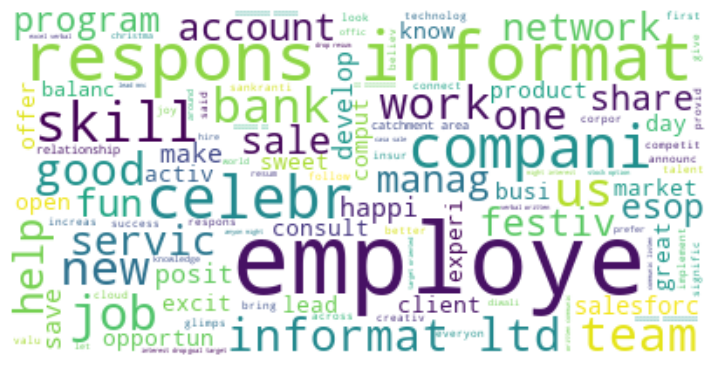

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# ... Previous code ...

# Concatenate the "Post text" column values into a single string
text = " ".join(i for i in ldata['Post text'])

# Set stopwords and generate the word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(9, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Visualize results in word cloud | Tags in posts

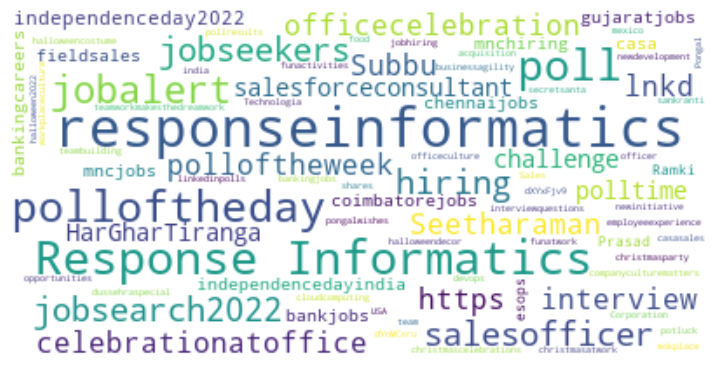

In [26]:
text = " ".join(str(i) for i in ldata['Tags in Post'])  # Convert float values to strings
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(9, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# L & T LinkedIn Text Analytics

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ltdata = pd.read_csv("L&TlinkedInPostDetails.csv")
print(ltdata.head())

   postNumber                                          Post text  \
0           1  Thrilled to announce that we have won three pr...   
1           2  And India soars to the moon! 🚀\n\nOur congratu...   
2           3  Did you know that there is only one radiologis...   
3           4  📢 Last week, we organized a first-of-its-kind ...   
4           5  Semiconductors are responsible for nearly ever...   

  Time Posted Before                                       Tags in Post  \
0                 4d  nasscom,#NASSCOMSpotlightAwards,#InnovationLea...   
1                 1d  ISRO - Indian Space Research Organization,#Cha...   
2                 3d  Brandon Lewis,https://bit.ly/3qn082r,insight.t...   
3                 2w              #MysoreOpenHack,#EngineeringTheChange   
4                 5d  https://lnkd.in/g-rkfA6k,#SystemDesign,#Semico...   

   Number of likes         Profile links of people who liked the post  
0              634                                                Na

In [ ]:
# Data preprocessing

In [24]:
ltdata.isnull().sum()

postNumber                                    0
Post text                                     0
Time Posted Before                            0
Tags in Post                                  0
Number of likes                               0
Profile links of people who liked the post    1
dtype: int64

In [25]:
ltdata.dropna()

,postNumber,Post text,Time Posted Before,Tags in Post,Number of likes,Profile links of people who liked the post
1,2,And India soars to the moon! 🚀\n\nOur congratu...,1d,"ISRO - Indian Space Research Organization,#Cha...",1297,https://www.linkedin.com/in/ACoAABn80IIBMlyrra...
2,3,Did you know that there is only one radiologis...,3d,"Brandon Lewis,https://bit.ly/3qn082r,insight.t...",0,https://www.linkedin.com/in/ACoAABn80IIBMlyrra...
3,4,"📢 Last week, we organized a first-of-its-kind ...",2w,"#MysoreOpenHack,#EngineeringTheChange",938,https://www.linkedin.com/in/ACoAADj38MoBQo2jcq...
4,5,Semiconductors are responsible for nearly ever...,5d,"https://lnkd.in/g-rkfA6k,#SystemDesign,#Semico...",0,https://www.linkedin.com/in/ACoAADj38MoBQo2jcq...
5,6,We recently had a fun rapid-fire round with Ab...,6d,"Abhishek Sinha,#EngineeringTheChange",517,https://www.linkedin.com/in/ACoAAB0OGDgByo2z1e...
6,7,"""In today’s evolving engineering landscape, nu...",1w,"Amit Chadha,https://lnkd.in/gXSjdeZU,#Sweden,#...",0,https://www.linkedin.com/in/ACoAAB0OGDgByo2z1e...
7,8,We are honoured to be recognized with the 'Ind...,2w,"Komatsu UK Ltd,#Collaboration,#Innovation,#Eng...",482,https://www.linkedin.com/in/ACoAADbiMl0B5I2X50...
8,9,🌽 One of our customers wanted to develop and i...,1mo,"https://lnkd.in/gJZWBkEs,#EngineeringTheChange",526,https://www.linkedin.com/in/ACoAADw1QbEBzs__oZ...
9,10,"👋Say hello to Kavish, from our mechanical engi...",1w,"Kavish,#MechanicalEngineering,#EngineeringTheC...",863,https://www.linkedin.com/in/ACoAADZ2WxABz8fX5m...
10,11,We are at Booth #606 at AutoTech: Detroit 2023...,1mo,"https://lnkd.in/ggB4ibrz,#Automotive,#Mobility...",1225,https://www.linkedin.com/in/ACoAADs28SsBsXcFZm...


In [ ]:
# Text mining

In [27]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
ltdata["Post text"] = ltdata["Post text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91852\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Visualize results in word cloud | text in Posts

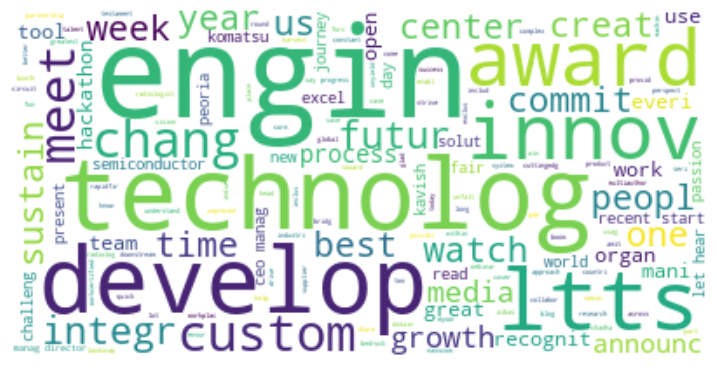

In [28]:
# Concatenate the "Post text" column values into a single string
text = " ".join(i for i in ltdata['Post text'])

# Set stopwords and generate the word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(9, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Visualize results in word cloud | Tags in Posts

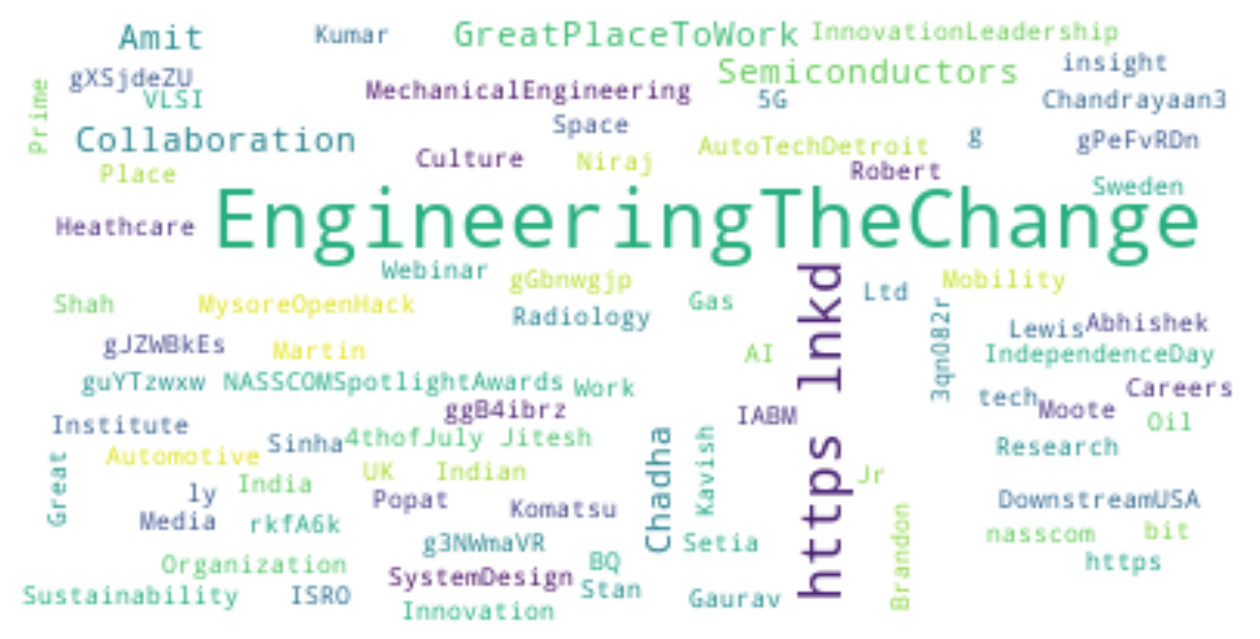

In [31]:
text = " ".join(str(i) for i in ltdata['Tags in Post'])  # Convert float values to strings
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(16, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()